In [4]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')
sample = pd.read_csv('sample_submit.csv', header=None)

In [7]:
train.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,0,5.3,3.7,1.5,0.2,Iris-setosa
1,1,6.8,2.8,4.8,1.4,Iris-versicolor
2,3,6.1,3.0,4.9,1.8,Iris-virginica
3,4,6.4,3.2,5.3,2.3,Iris-virginica
4,5,6.3,3.3,4.7,1.6,Iris-versicolor


In [11]:
train.describe()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,72.773333,5.922667,3.097333,3.844000,1.220000
std,46.039223,0.877277,0.443565,1.852116,0.787572
min,0.000000,4.400000,2.000000,1.000000,0.100000
25%,33.000000,5.100000,2.800000,1.550000,0.200000
50%,72.000000,5.900000,3.000000,4.400000,1.400000
75%,114.000000,6.450000,3.350000,5.250000,1.800000
max,149.000000,7.900000,4.200000,6.900000,2.500000


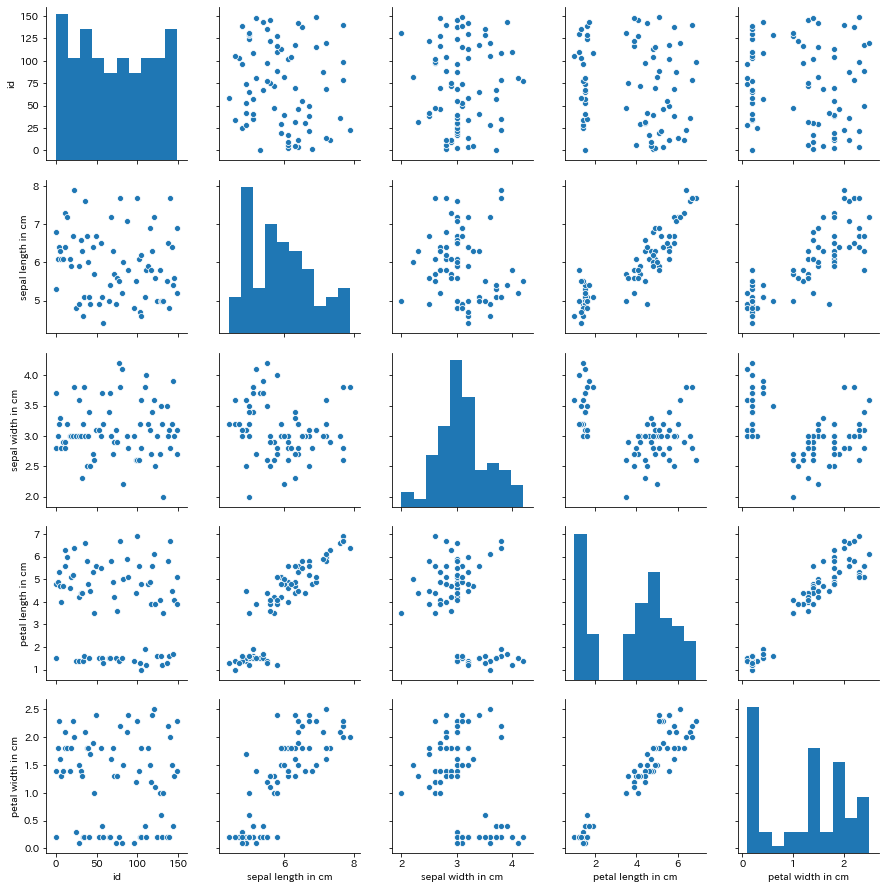

In [12]:
sns.pairplot(train)

In [28]:
train.isnull().any()

id                    False
sepal length in cm    False
sepal width in cm     False
petal length in cm    False
petal width in cm     False
class                 False
dtype: bool

In [13]:
test.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,2,6.1,2.8,4.7,1.2
1,7,6.3,2.5,4.9,1.5
2,8,6.2,3.4,5.4,2.3
3,10,6.7,3.1,4.7,1.5
4,13,5.0,3.4,1.6,0.4


In [37]:
X = train[['sepal length in cm', 'sepal width in cm', 'petal length in cm','petal width in cm']]
y = train['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
X_train.shape

(56, 4)

In [39]:
X_test.shape

(19, 4)

In [ ]:
# 特徴選択

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [64]:
skb = SelectKBest(chi2, k='all')

In [65]:
skb.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x0000024161B81948>)

In [66]:
X_train_skb = skb.transform(X_train)

In [67]:
X_train_skb.shape, X_train.shape

((56, 4), (56, 4))

In [ ]:
clf = LogisticRegression()

In [85]:
from sklearn.model_selection import StratifiedKFold

k_range = np.arange(1, 5)
scores = []
std = []

for k in k_range:
    skf = StratifiedKFold(n_splits=10,
                        shuffle=True,
                        random_state=2)
    score = []
    for train2, test2 in skf.split(X, y):
        
        X_train2 = X.iloc[train2]
        y_train2 = y.iloc[train2]
        X_test2 = X.iloc[test2]
        y_test2 = y.iloc[test2]

        skb = SelectKBest(chi2, k=k)
        
        skb.fit(X_train2, y_train2)
        
        X_new_train2 = skb.transform(X_train2)
        X_new_test2 = skb.transform(X_test2)
        
        clf.fit(X_new_train2, y_train2)
        score.append(clf.score(X_new_test2, y_test2))
        
    scores.append(np.array(score).mean())
    std.append(np.array(score).std())
    
scores = np.array(scores)
std = np.array(std)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defau

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defau

In [86]:
scores

array([0.71904762, 0.73154762, 0.8609127 , 0.90059524])

In [87]:
std

array([0.03067643, 0.05586683, 0.13091765, 0.13117   ])

<ErrorbarContainer object of 3 artists>

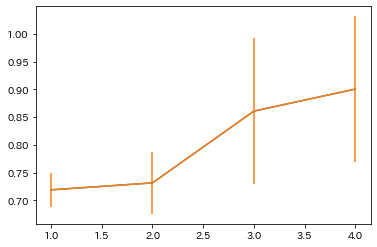

In [88]:
plt.plot(k_range, scores)
plt.errorbar(k_range, scores, yerr=std)

<BarContainer object of 4 artists>

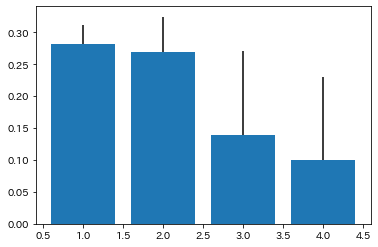

In [89]:
plt.bar(k_range, 1-scores, yerr=[np.zeros(std.shape), std])

In [ ]:
# 特徴変換 PCA

In [90]:
from sklearn.decomposition import PCA
pca = PCA()

In [92]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [93]:
X_new_pca = pca.transform(X)

In [95]:
type(X_new_pca)

numpy.ndarray

In [99]:
X_new_pca.shape

(75, 4)

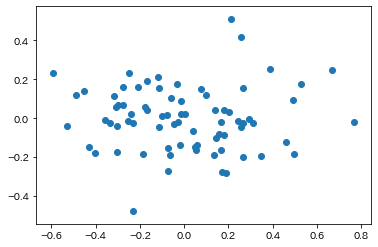

In [103]:
plt.scatter(X_new_pca[:,2], X_new_pca[:,3])

In [110]:
X_new_pca_df = DataFrame(X_new_pca, columns=['sepal length in cm', 'sepal width in cm', 'petal length in cm','petal width in cm'])
X_new_pca_df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,-2.647236,-0.525867,-0.027910,-0.022036
1,1.231469,-0.188362,-0.488073,0.119357
2,1.181543,0.193372,0.242468,-0.015166
3,1.792488,-0.026530,0.529802,0.174118
4,0.987782,-0.211493,0.181588,-0.084694
...,...,...,...,...
70,0.827070,-0.250048,0.005246,0.022958
71,-2.386448,-0.680558,0.167155,-0.018826
72,0.136756,0.335440,0.165175,-0.164374
73,-0.120894,0.795353,0.257256,-0.047682


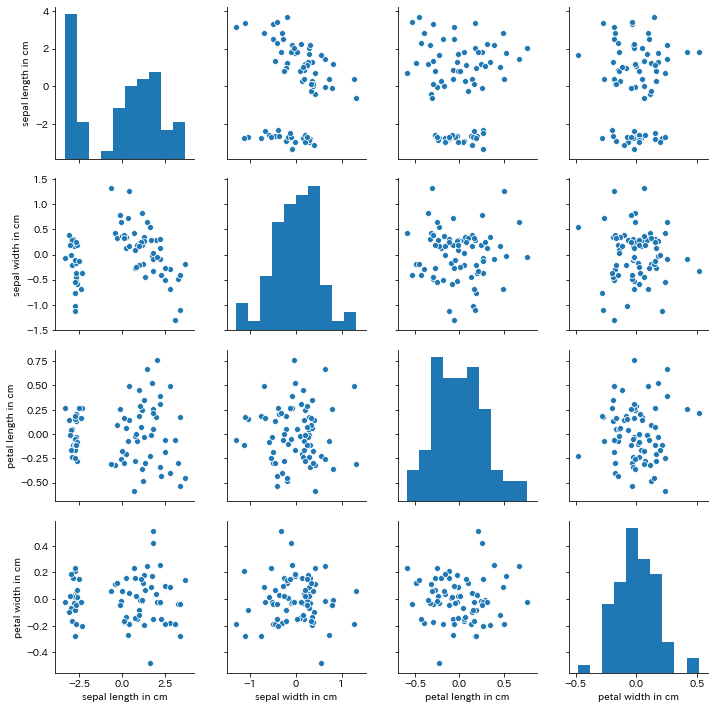

In [111]:
sns.pairplot(X_new_pca_df)

In [114]:
clf.fit(X_new_pca, y_train)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [75, 56]

In [40]:
# Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
X_train_scale = scaler.transform(X_train)

In [43]:
X_train_scale.mean(axis=0),X_train_scale.std(axis=0)

(array([ 1.66533454e-16,  7.29575130e-16, -2.61695427e-16, -4.75809868e-16]),
 array([1., 1., 1., 1.]))

In [46]:
X_test_scale = scaler.transform(X_test)

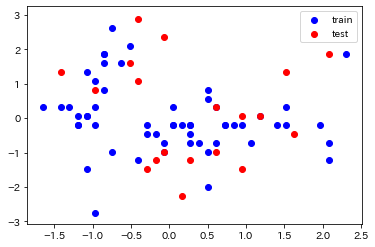

In [48]:
plt.scatter(X_train_scale[:,0], X_train_scale[:,1] ,c='blue', label='train')
plt.scatter(X_test_scale[:,0], X_test_scale[:,1], c='red', label='test')
plt.legend()

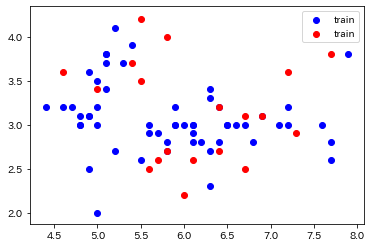

In [50]:
plt.scatter(X_train['sepal length in cm'], X_train['sepal width in cm'] ,c='blue', label='train')
plt.scatter(X_test['sepal length in cm'], X_test['sepal width in cm'] ,c='red', label='train')
plt.legend()

In [52]:
clf = LogisticRegression()

In [54]:
clf.fit(X_train_scale, y_train)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
clf.score(X_train_scale, y_train), clf.score(X_test_scale, y_test)

(0.875, 0.8421052631578947)

In [58]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(0.8928571428571429, 1.0)